In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

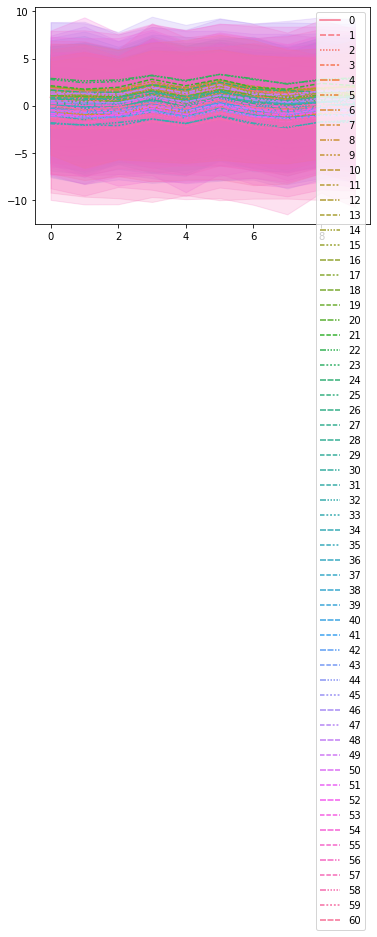

In [2]:
#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
ax = sns.lineplot(ax=ax, data=timeSeries)
# print(df.values)
plt.show()

In [3]:
timeSeries

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.902777,-0.048083,0.537222,0.234536,1.349390,1.200003,1.739148,1.847107,2.095337,2.654242,...,-3.864053,-4.609645,-3.962831,-3.870779,-4.776690,-4.101398,-3.960275,-4.526731,-4.544507,-3.866064
1,0.753493,1.075985,1.503939,1.465930,1.879628,2.134544,2.583310,2.819159,2.567619,3.440984,...,-3.242125,-3.351749,-3.629325,-3.729017,-3.737655,-3.960077,-3.882258,-3.145527,-3.249465,-3.804899
2,0.541138,0.523127,0.742652,1.273633,1.839930,1.735894,2.507990,2.212550,2.910937,3.510932,...,-3.092486,-3.610262,-3.241339,-3.196302,-3.313152,-4.177140,-4.066245,-4.056593,-3.412009,-3.248464
3,0.873676,0.768109,1.095097,1.545091,2.186378,2.923206,2.411889,3.161844,3.459803,3.684178,...,-2.775691,-3.181743,-2.998833,-2.597153,-3.560342,-3.387976,-3.326435,-2.752253,-3.087570,-2.963901
4,1.346830,1.992684,2.567664,2.821829,3.050686,3.282943,3.387896,4.281089,4.053532,4.717562,...,-2.276440,-2.351260,-2.624530,-2.485852,-2.249715,-2.688826,-2.779740,-1.859805,-2.491565,-2.341180
5,2.002579,2.220189,2.905524,2.539440,2.721639,3.109006,3.262316,4.415537,4.400265,4.188490,...,-1.509125,-1.382812,-1.515569,-2.275081,-1.693094,-1.703306,-2.063613,-1.987449,-2.115295,-1.799159
6,0.214728,1.281332,1.305798,1.508786,1.520201,1.723386,2.529217,2.458765,3.072667,3.619516,...,-2.657356,-3.054598,-3.248583,-3.376131,-3.229105,-3.313042,-3.773540,-3.196692,-3.094117,-3.631756
7,-0.872689,-0.111937,0.768041,0.862192,0.776986,1.535106,1.726877,1.499243,2.338512,2.029177,...,-3.722836,-4.108897,-4.694629,-4.084667,-4.617877,-4.159987,-4.665222,-3.861446,-3.986699,-4.202882
8,-0.530805,0.087150,0.938080,0.652108,1.521118,1.495870,2.370053,2.078260,2.298868,2.948513,...,-3.660787,-3.807815,-4.330468,-3.918856,-3.589595,-4.196767,-3.533970,-4.291361,-3.898146,-3.853714
9,0.219629,0.947585,1.361986,1.237039,1.711709,2.576266,2.332791,3.275572,3.583027,3.724966,...,-2.837344,-2.658955,-2.817935,-3.671086,-3.775370,-2.988001,-3.614010,-2.975410,-3.016393,-3.316844


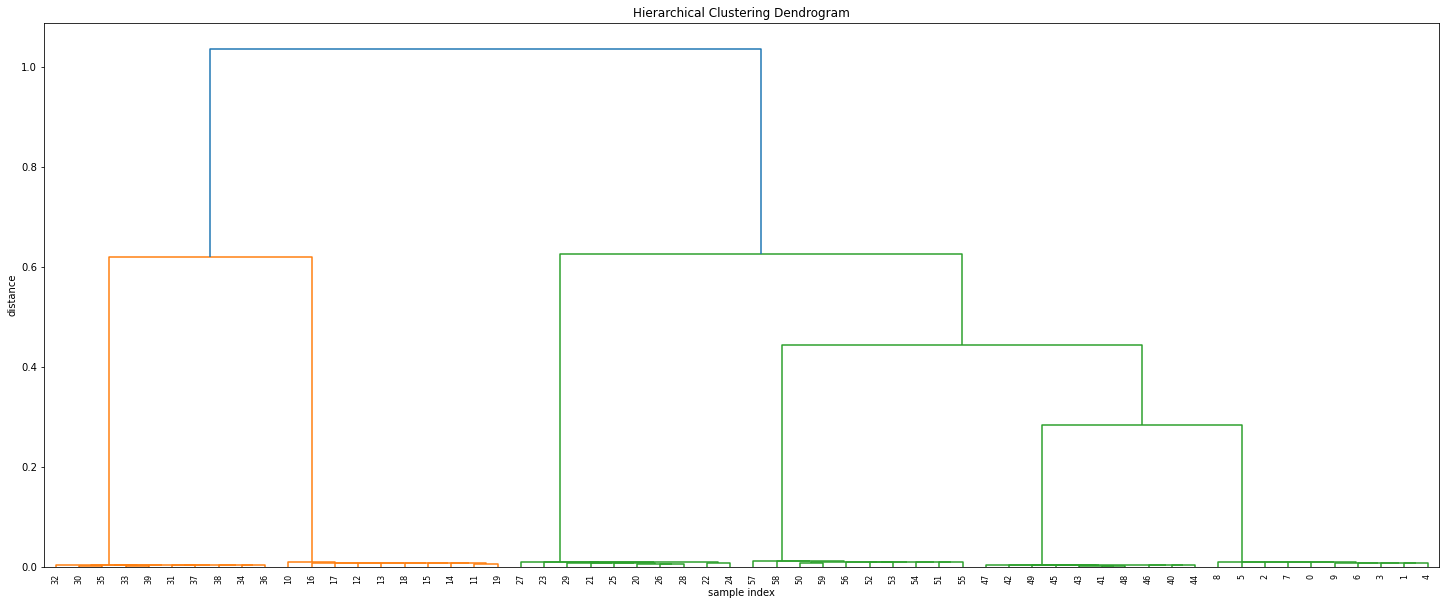

In [4]:
# Do the clustering
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

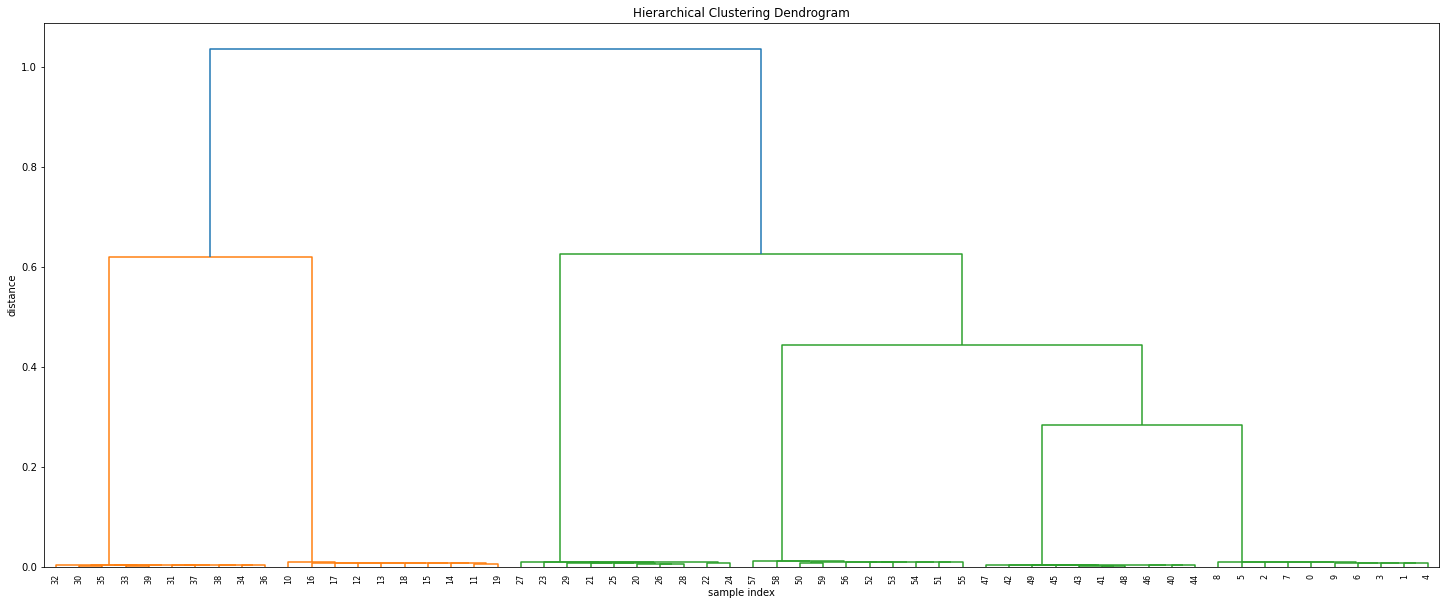

In [5]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 6, plot=False)

Cluster 6 number of entries 10
Cluster 2 number of entries 10
Cluster 3 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 4 number of entries 10


0.008 --> 0.006 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 


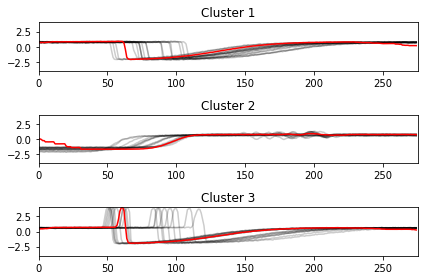

In [8]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# Keep first 3 classes and 50 first time series
X_train = X_train[y_train < 4]
X_train = X_train[:50]
numpy.random.shuffle(X_train)
# For this method to operate properly, prior scaling is required
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

# kShape clustering
ks = KShape(n_clusters=3, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()